# Thermodynamic Features

Andrew Weng

8/25/2022

Workspace to demonstrate various methods to convert various forms of battery degradation parameters into full cell equilibrium potential curves.

Requirements:

- Cathode OCV curve data
- Anode OCV curve data

Half-cell OCV curve data could either be empirical or a function. This notebook assumes that we have a mathematical function to descrive each curve, e.g. $U_p = U_p(y)$ where $y \in (0,1)$ is the positive electrode stoichiometry. Similarly, $U_n = U_n(x)$ where $ x \in (0, 1)$.

Empirical functions of half cells can also be given as an interpolating function.

## Models

#### 'LAM' Basis

- State vector: $[\mathrm{LAM}_\mathrm{NE}, \mathrm{LAM}_\mathrm{PE}, \mathrm{LLI}]^T$
- Consists of normalized losses of active material in the positive and negative electrodes, as well as loss of lithium inventory.
- All quantities are expressed as percentages relative to a 'fresh cell' quantity.

####  'DEG'(radation) Basis

- State vector: $[C_n, C_p, n_{\mathrm{Li}}]^T$
- Consists of absolute pos. and neg. active material capacities, as well as lithium inventory (in moles).

#### 'ESOH' Basis

- State vector: $[x_{100}, y_{100}, C_n, C_p, C]^T$, or equivalently, $[x_{0}, y_{0}, C_n, C_p, C]^T$.

#### 'VOC' Basis

- State vector: $[q, V_{oc}(q), U_n(q), U_p(q)]^T$
- Main basis for making the plots

### Basis Transformations

It is possible to interchange between each basis state.

A: 'LAM' to 'DEG'

\begin{align}
    C_n &= C_{n,0} (1 - \mathrm{LAM}_\mathrm{NE}) \\
    C_p &= C_{p,0} (1 - \mathrm{LAM}_\mathrm{PE}) \\
    n_{\mathrm{Li}} & = n_{\mathrm{Li},0}(1 - \mathrm{LLI})
\end{align}

B: 'DEG' to 'ESOH'




C: 3 --> 4


In [1]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import src.plotter as plotter
import src.dvdq as dvdq

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

plotter.initialize(plt)

Text(0, 0.5, 'U (V vs Li/Li$^+$)')

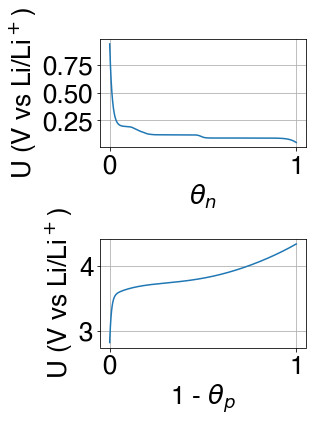

In [3]:
theta_n = np.linspace(0, 1, 1000)
theta_p = np.linspace(0, 1, 1000)

ocv_neg = dvdq.f_neg_ocv(theta_n)
ocv_pos = dvdq.f_pos_ocv(theta_p)

plt.figure(figsize=(5, 6))

plt.subplot(2, 1, 1)
plt.plot(theta_n, ocv_neg)
plt.xlabel(r'$\theta_n$')
plt.ylabel('U (V vs Li/Li$^+$)')
plt.subplot(2, 1, 2)
plt.plot(1 - theta_p, ocv_pos)
plt.xlabel(r'1 - $\theta_p$')
plt.ylabel('U (V vs Li/Li$^+$)')

## Demonstration of converting eSOH metrics to OCV

In [4]:
Cn = 5.97 # Ah
Cp = 5.97 # Ah
x100 = 0.9
y100 = 0.2

# Full cell capacity
qmax = 5.5 # Ah
q = np.linspace(0, qmax, 1000)

(Voc, Up, Un) = dvdq.esoh_to_voc(x100, y100, Cn, Cp, q)

make_plot(q, Voc, Up, Un)

NameError: name 'esoh_to_voc' is not defined

## Demonstration of converting degradation parameters to eSOH

x100 = [1.02955482], y100 = [0.08717356]


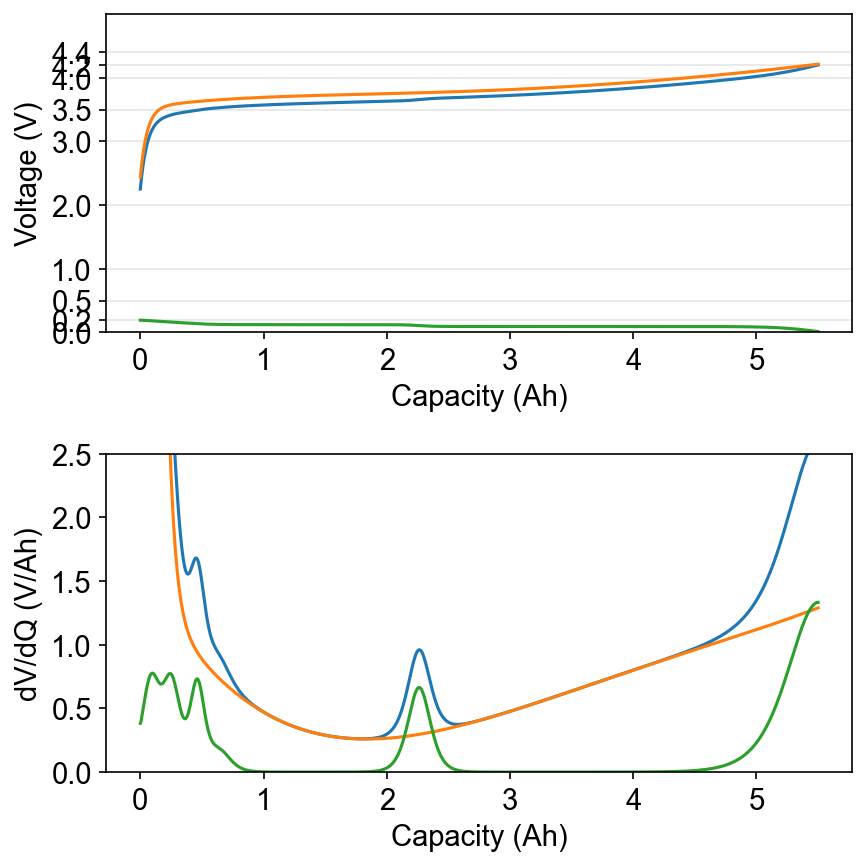

In [ ]:
Cn = 6.0 # Ah
Cp = 6.0 # Ah
nlli = 0.25

Vmax = 4.2

(x100, y100) = deg_to_esoh(Cn, Cp, nlli, Vmax)

print(f'x100 = {x100}, y100 = {y100}')

(Voc, Up, Un) = esoh_to_voc(x100, y100, Cn, Cp, q)

make_plot(q, Voc, Up, Un)

## Demonstration of the graphical approach

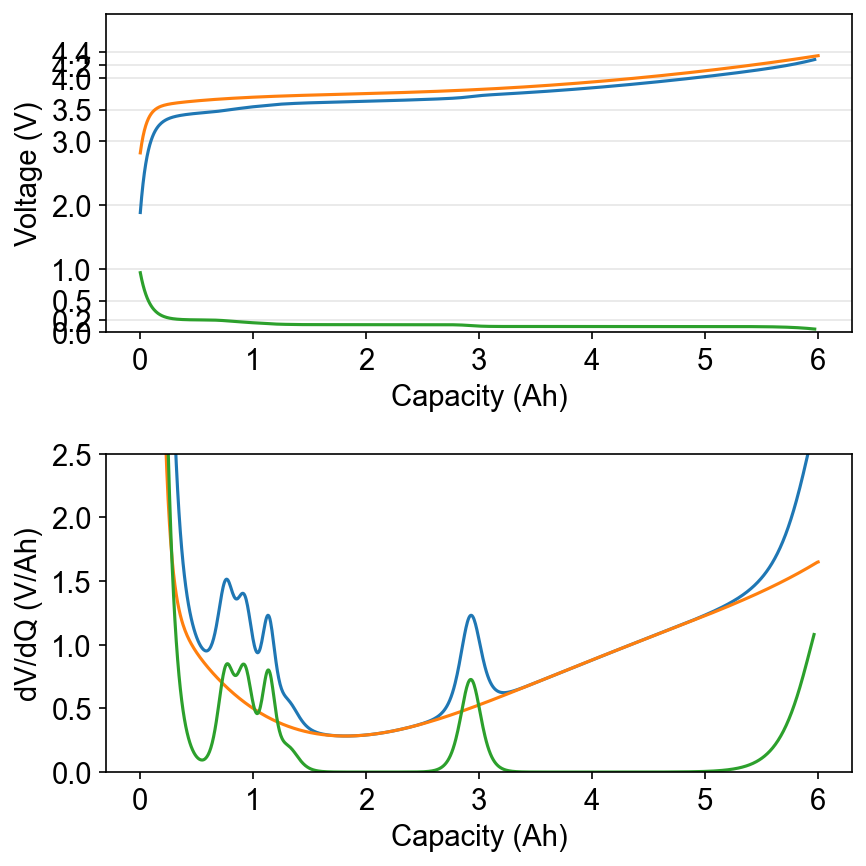

In [ ]:
lli = 0.0
lam_pe = 0.0
lam_ne = 0.0
Cn = 5.97
Cp = 6.00

(Voc, Un, Up, cap) = deg_to_voc_graphical(lam_pe, lam_ne, lli, Cp, Cn)

make_plot(cap, Voc, Up, Un)